# Sentiment Analysis on TripAdvisor  Data

Load the Libraries

In [ ]:
!pip install spaCy

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=ec914160dbffb153e991dd8c112d2c8d19999c2db9abce59902669031bd7f120
  Stored in directory: /tmp/pip-ephem-wheel-cache-ph6ngzq5/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install beautifulsoup4

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


True

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

Upload Data

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving MASTER DATABASE.csv to MASTER DATABASE.csv


In [ ]:
#Read Dataset
df = pd.read_csv(io.BytesIO(uploaded['MASTER DATABASE.csv']))
df.head()

,CONTINENT,COUNTRY,HOTEL,REVIEW DATE,FEEDBACK,REVIEW,STAY DATE
0,NORTH AMERICA,USA,AQUALINA RESORT,18-10-2020,Best staycation,Had such a nice staycation at Acqualina! Loved...,October 2020
1,NORTH AMERICA,USA,AQUALINA RESORT,11-10-2020,EXCELLENT,I had the pleasure to visit Miamias best kept ...,October 2020
2,NORTH AMERICA,USA,AQUALINA RESORT,05-10-2020,Honeymoon During COVID,Amazing! Had lots of gluten free options! Staf...,September 2020
3,NORTH AMERICA,USA,AQUALINA RESORT,01-09-2020,First time...but hopefully not the last,"If you're going to Acqualina, prepare to be wo...",September 2020
4,NORTH AMERICA,USA,AQUALINA RESORT,01-09-2020,COVID Safety was paramount,Frequent visitor---as an older dentist Covid p...,August 2020


In [ ]:
import spacy
import en_core_web_lg
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

nlp = en_core_web_lg.load()
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

# Want to keep negative stop words for sentiment analysis
stopword_list.remove('no')
stopword_list.remove('not')

In [ ]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>text text text</h2></html>')

'text text text'

In [ ]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('some accented letters â î or ô')

'some accented letters a i or o'

In [ ]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match) \
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("y'all I've don't I'd we're")

'you all I have do not I would we are'

In [ ]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("S0me sp3ci@l c#@4@c|3rs *&)@&)@#&", remove_digits=True)

'Sme spcil ccrs '

In [ ]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text(str(df.REVIEW[0]))

'have such a nice staycation at Acqualina ! love everything especially the staff ! and especially the staff at the pool and beach . everyone anticipate your need before you even think of them yourself ! at the beach , Hector be so nice and so helpful and come up to us the moment he see we be wait for chair . also at the pool Zeta be so sweet and friendly and be a big help ! love everyone here !'

In [ ]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

remove_stopwords(str(df.REVIEW[0]))

'nice staycation Acqualina ! Loved everything especially staff ! especially staff pool beach. Everyone anticipated needs even thought ! beach , Hector nice helpful came us moment saw waiting chairs. Also pool Zeta sweet friendly big help ! Loved everyone !'

In [ ]:
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, contraction_expansion=True, 
                    text_lower_case=True, text_lemmatization=True, special_char_removal=True, stopword_removal=True,
                    remove_digits=True):
    normalized_corpus = []
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        # turn into lowercase
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and/or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespaces
        doc = re.sub(' _', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
    
    return normalized_corpus

In [ ]:
# combine news headline and article text into one doc
df['full_text'] = df["FEEDBACK"].map(str)+ '. ' + df["REVIEW"]

# pre-process text
df['clean_text'] = normalize_corpus(df['full_text'])
norm_corpus = list(df['clean_text'])
df.iloc[1][['full_text', 'clean_text']].to_dict()

{'clean_text': 'excellent pleasure visit miamias best keep secret along gorgeous sunny isle miami not realize quiet like acqualina thrive amid south florida chaos get understand lure repeat vacationer incognito celebrity picture perfect beach service impeccable utterly impressed hotel buzz almost regular day dining venue full breakfast dinner solid loyal clientele local foreign acqualina defy crisis impeccable service innovation ultimate pandemic safety experience know acqualina resort residence recognize best reader choice award usa today good destination resort united states good waterfront hotel united states good hotel spa united states award acqualina spa espa dining il mulino acqualina first night not want go property eat anywhere else award forbes travel guide recommend award exceptional dining experience dine last evening santiago waiter outdo service provide never forget good tasting grappa offer us dinner aperitif complimentary btw bartender william good bar tend skill iave s

# Text Parsing

POS Tagging


In [ ]:
# pre-process, but don't lowercase or lemmatize to get POS context
corpus = normalize_corpus(df['full_text'], text_lower_case=False, text_lemmatization=False, special_char_removal=False)

# demo for POS tagging
sentence = str(df.iloc[0].REVIEW)
sentence_nlp = nlp(sentence)

# POS tagging with spacy
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
df_spacy_pos_tagged = pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
df_nltk_pos_tagged = pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])


In [ ]:
sentence

'Had such a nice staycation at Acqualina! Loved everything especially the staff! And especially the staff at the pool and beach. Everyone anticipated your needs before you even thought of them yourself! At the beach, Hector was SO nice and so helpful and came up to us the moment he saw we were waiting for chairs. Also at the pool Zeta was so sweet and friendly and was a big help! Loved everyone here !'

In [ ]:
df_spacy_pos_tagged

,Word,POS tag,Tag type
0,Had,VBD,AUX
1,such,PDT,DET
2,a,DT,DET
3,nice,JJ,ADJ
4,staycation,NN,NOUN
...,...,...,...
77,!,.,PUNCT
78,Loved,VBD,VERB
79,everyone,NN,PRON
80,here,RB,ADV


In [ ]:
df_nltk_pos_tagged

,Word,POS tag
0,Had,NNP
1,such,PDT
2,a,DT
3,nice,JJ
4,staycation,NN
...,...,...
70,help!,NN
71,Loved,VBD
72,everyone,NN
73,here,RB


Shallow Parsing (Chunking)

In [ ]:
# using nltk conll2000 corpus to train the shallow parser model
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:]

print(len(train_data), len(test_data))
print(train_data[0])

10900 48
(S
  (NP Confidence/NN)
  (PP in/IN)
  (NP the/DT pound/NN)
  (VP is/VBZ widely/RB expected/VBN to/TO take/VB)
  (NP another/DT sharp/JJ dive/NN)
  if/IN
  (NP trade/NN figures/NNS)
  (PP for/IN)
  (NP September/NNP)
  ,/,
  due/JJ
  (PP for/IN)
  (NP release/NN)
  (NP tomorrow/NN)
  ,/,
  (VP fail/VB to/TO show/VB)
  (NP a/DT substantial/JJ improvement/NN)
  (PP from/IN)
  (NP July/NNP and/CC August/NNP)
  (NP 's/POS near-record/JJ deficits/NNS)
  ./.)


In [ ]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[0])
wtc

[('Confidence', 'NN', 'B-NP'),
 ('in', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('pound', 'NN', 'I-NP'),
 ('is', 'VBZ', 'B-VP'),
 ('widely', 'RB', 'I-VP'),
 ('expected', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('take', 'VB', 'I-VP'),
 ('another', 'DT', 'B-NP'),
 ('sharp', 'JJ', 'I-NP'),
 ('dive', 'NN', 'I-NP'),
 ('if', 'IN', 'O'),
 ('trade', 'NN', 'B-NP'),
 ('figures', 'NNS', 'I-NP'),
 ('for', 'IN', 'B-PP'),
 ('September', 'NNP', 'B-NP'),
 (',', ',', 'O'),
 ('due', 'JJ', 'O'),
 ('for', 'IN', 'B-PP'),
 ('release', 'NN', 'B-NP'),
 ('tomorrow', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('fail', 'VB', 'B-VP'),
 ('to', 'TO', 'I-VP'),
 ('show', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('substantial', 'JJ', 'I-NP'),
 ('improvement', 'NN', 'I-NP'),
 ('from', 'IN', 'B-PP'),
 ('July', 'NNP', 'B-NP'),
 ('and', 'CC', 'I-NP'),
 ('August', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('near-record', 'JJ', 'I-NP'),
 ('deficits', 'NNS', 'I-NP'),
 ('.', '.', 'O')]

In [ ]:
# extract POS and chunk tags from sentences with chunked annotations
def conll_tags_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

# function to train multiple taggers
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [ ]:
%%time

from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.chunk import ChunkParserI

# chunker class
class NGramTagChunker(ChunkParserI):
    def __init__(self, train_sentences, tagger_classes=[UnigramTagger, BigramTagger]):
        # get the POS and chunk tags using our function above
        train_sent_tags = conll_tags_chunks(train_sentences)
        # train chunk tagger from POS tags
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)
    
    def parse(self, tagged_sentence):
        if not tagged_sentence:
            return None
        # get POS tags from our tagged sentence
        pos_tags = [tag for word, tag in tagged_sentence]
        # Get chunk tags from the trained taggers
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        # Combine token, pos tag and chunk tags
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                       in zip(tagged_sentence, chunk_tags)]
        return conlltags2tree(wpc_tags)
    
# train chunker model
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print('Performance on training data:\n', ntc.evaluate(train_data))
print()
print('Performance on test data:\n', ntc.evaluate(test_data))
        

Performance on training data:
 ChunkParse score:
    IOB Accuracy:  89.4%%
    Precision:     80.9%%
    Recall:        86.2%%
    F-Measure:     83.5%%

Performance on test data:
 ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%
CPU times: user 9.06 s, sys: 364 ms, total: 9.42 s
Wall time: 9.44 s


In [ ]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP Had/NNP such/PDT)
  (NP a/DT nice/JJ staycation/NN)
  (PP at/IN)
  (NP Acqualina!/NNP Loved/NNP everything/NN)
  especially/RB
  (NP the/DT staff!/NN)
  And/CC
  especially/RB
  (NP the/DT staff/NN)
  (PP at/IN)
  (NP the/DT pool/NN)
  and/CC
  (VP beach./VB)
  (NP Everyone/NNP anticipated/JJ)
  (NP your/PRP$ needs/NNS)
  (PP before/IN)
  (NP you/PRP)
  even/RB
  (VP thought/VBD)
  (PP of/IN)
  (NP them/PRP)
  (VP yourself!/VBP)
  (PP At/IN)
  (NP the/DT beach,/NN Hector/NNP)
  (VP was/VBD)
  (NP SO/NNP nice/JJ)
  and/CC
  so/RB
  (NP helpful/JJ)
  and/CC
  (VP came/VBD up/RB to/TO)
  (NP us/PRP the/DT moment/NN)
  (NP he/PRP)
  (VP saw/VBD)
  (NP we/PRP)
  (VP were/VBD waiting/VBG)
  (PP for/IN)
  (NP chairs./NN)
  Also/RB
  (PP at/IN)
  (NP the/DT pool/NN Zeta/NNP)
  (VP was/VBD so/RB)
  (NP sweet/JJ)
  and/CC
  (NP friendly/JJ)
  and/CC
  (VP was/VBD)
  (NP a/DT big/JJ help!/NN)
  (VP Loved/VBD)
  (NP everyone/NN)
  here/RB
  !/.)


# Sentiment Analysis

In [ ]:
!pip install afinn

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=9d5a2ef374ef0f40c918f690e9cb1d756566d266571097a08828b9c5fb4e1aaa
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                          else 'neutral' 
                          for score in sentiment_scores]

# sentiment statistics per news category
dfA = pd.DataFrame([list(df['HOTEL']), sentiment_scores, sentiment_category]).T
dfA.columns = ['HOTEL', 'sentiment_score', 'sentiment_category']
dfA['sentiment_score'] = dfA.sentiment_score.astype('float')
dfA.head()

,HOTEL,sentiment_score,sentiment_category
0,AQUALINA RESORT,24.0,positive
1,AQUALINA RESORT,103.0,positive
2,AQUALINA RESORT,15.0,positive
3,AQUALINA RESORT,29.0,positive
4,AQUALINA RESORT,17.0,positive


In [ ]:
dfA.groupby(by=['HOTEL']).describe()

sentiment_score             ...              
                                          count       mean  ...    75%    max
HOTEL                                                       ...              
ANANTARA PEACE HAVEN                      276.0  28.032609  ...  33.25  166.0
AQUALINA RESORT                            35.0  27.514286  ...  29.50  103.0
BANYAN TREE BINTAN                         39.0  21.769231  ...  25.50  105.0
CAPE GRACE                                 28.0  25.642857  ...  31.25  113.0
CENTARA CEYSANDS RESORT AND SPA           106.0  23.235849  ...  29.00   91.0
...                                         ...        ...  ...    ...    ...
TRIDENT                                   156.0  19.653846  ...  24.00   77.0
VICTORIA FALLS SAFARI LODGE                32.0  19.812500  ...  28.25   47.0
VIVANTA                                   248.0  16.866935  ...  22.00   75.0
WENTWORTH MANSION                          41.0  25.317073  ...  32.00   85.0
WINCHESTER MANSIONS                        21.0  20.190476  ...  28.00   37.0

[68 rows x 8 columns]

In [ ]:
dfA.groupby(by=['HOTEL']).describe().to_csv("hotelwise description.csv")

In [ ]:
import seaborn as sns

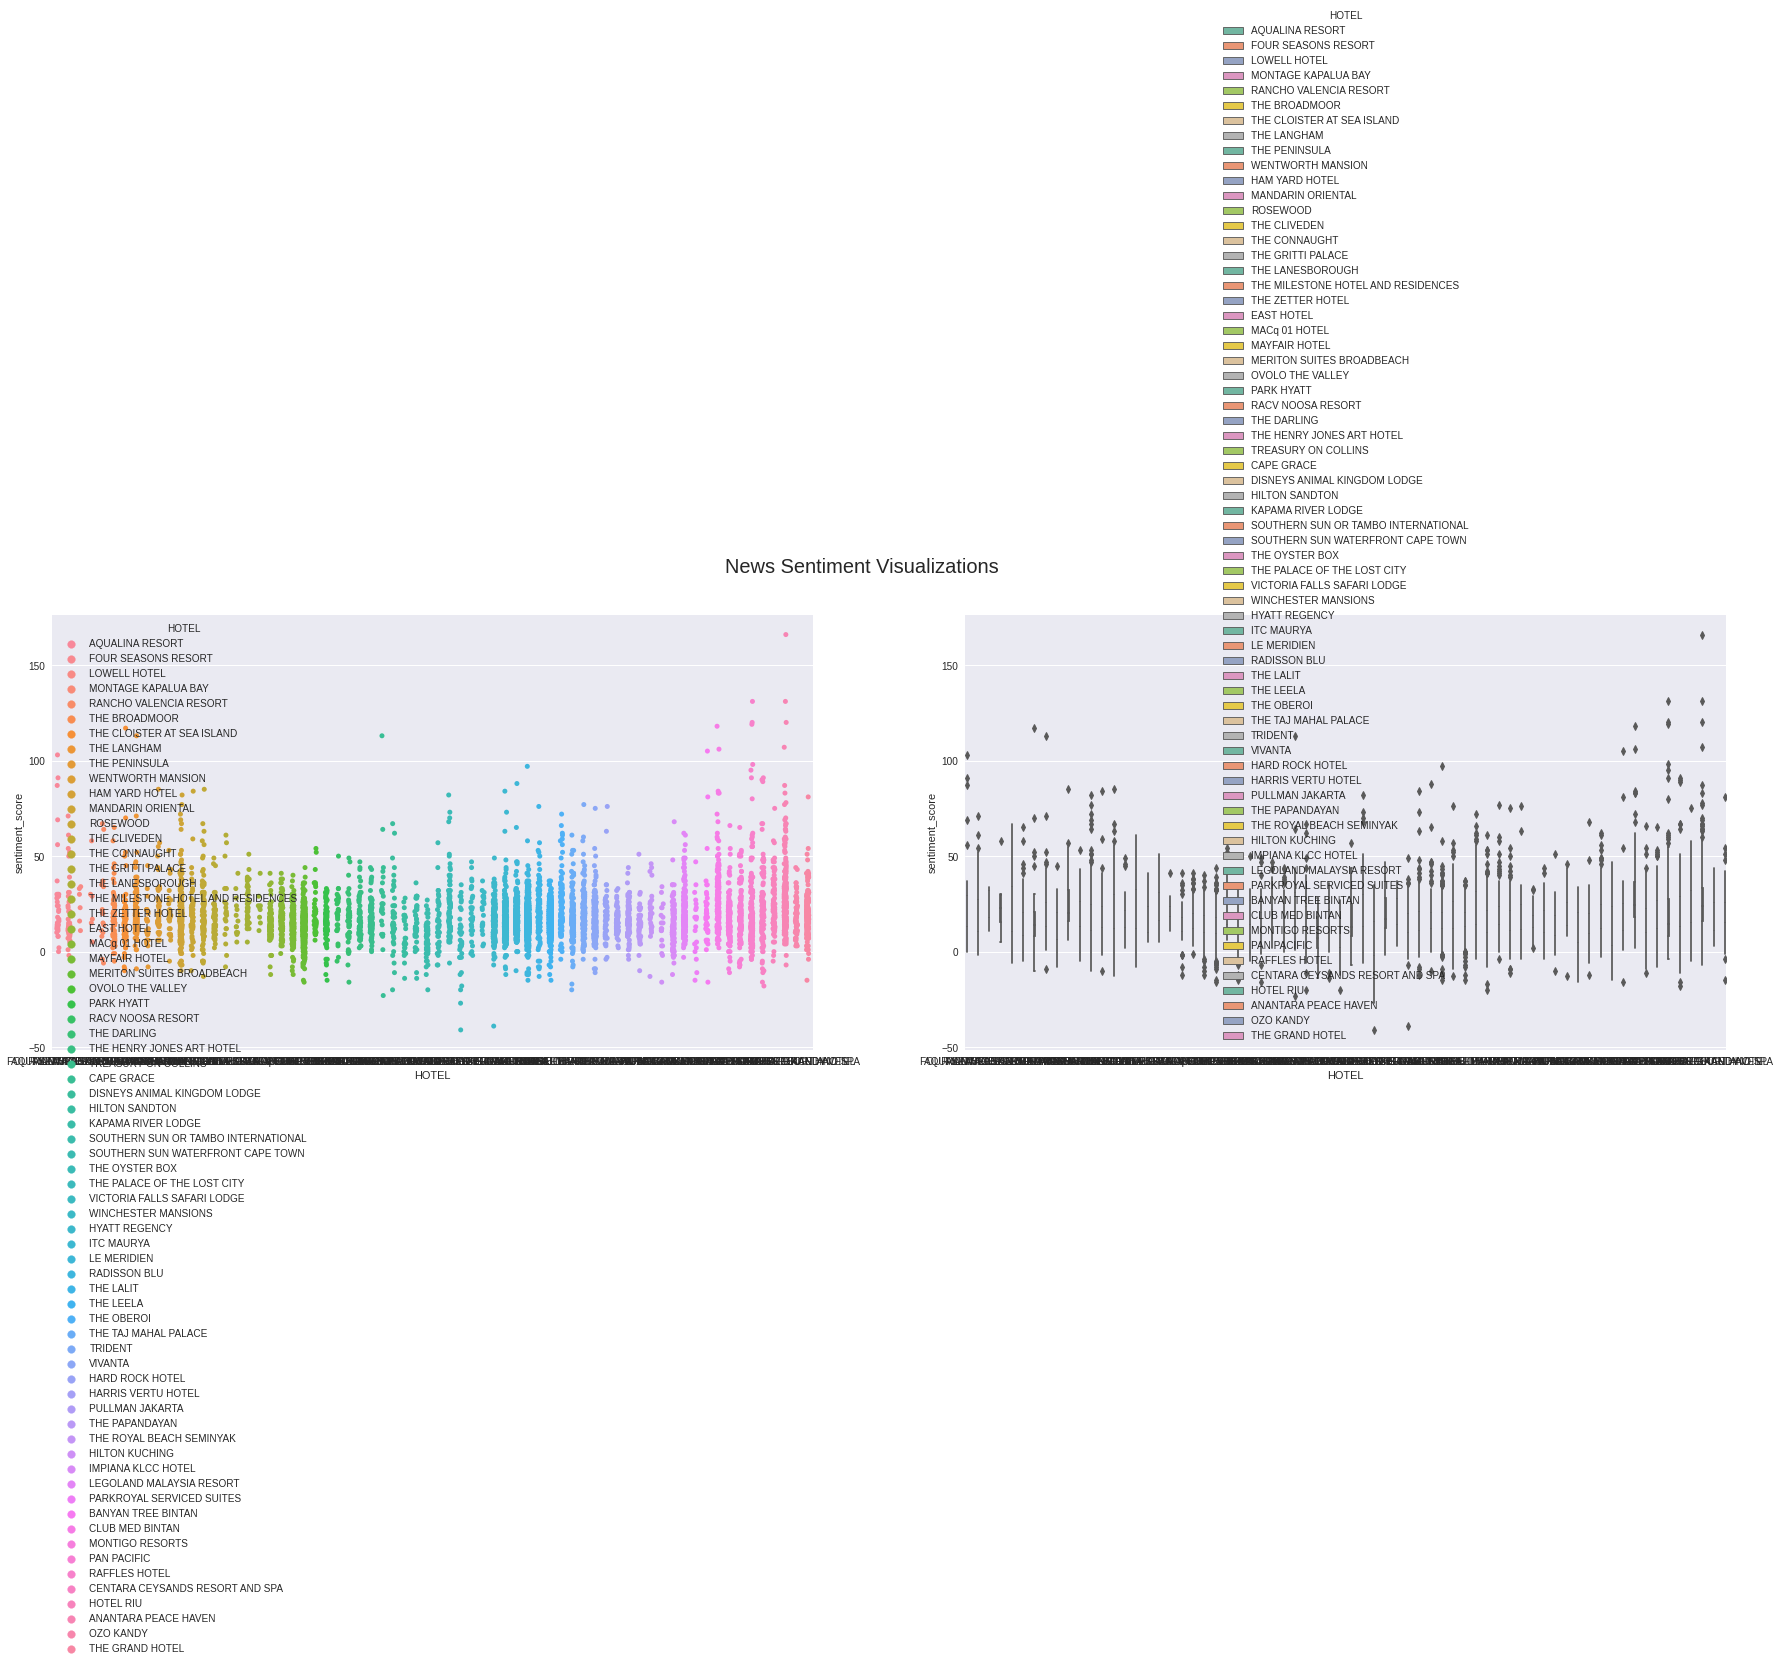

In [ ]:
plt.style.use("seaborn")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))
sp = sns.stripplot(x='HOTEL', y='sentiment_score', 
                   hue='HOTEL', data=dfA, ax=ax1)
bp = sns.boxplot(x='HOTEL', y='sentiment_score', 
                 hue='HOTEL', data=dfA, palette='Set2', ax=ax2)
t = f.suptitle('News Sentiment Visualizations', fontsize=20)

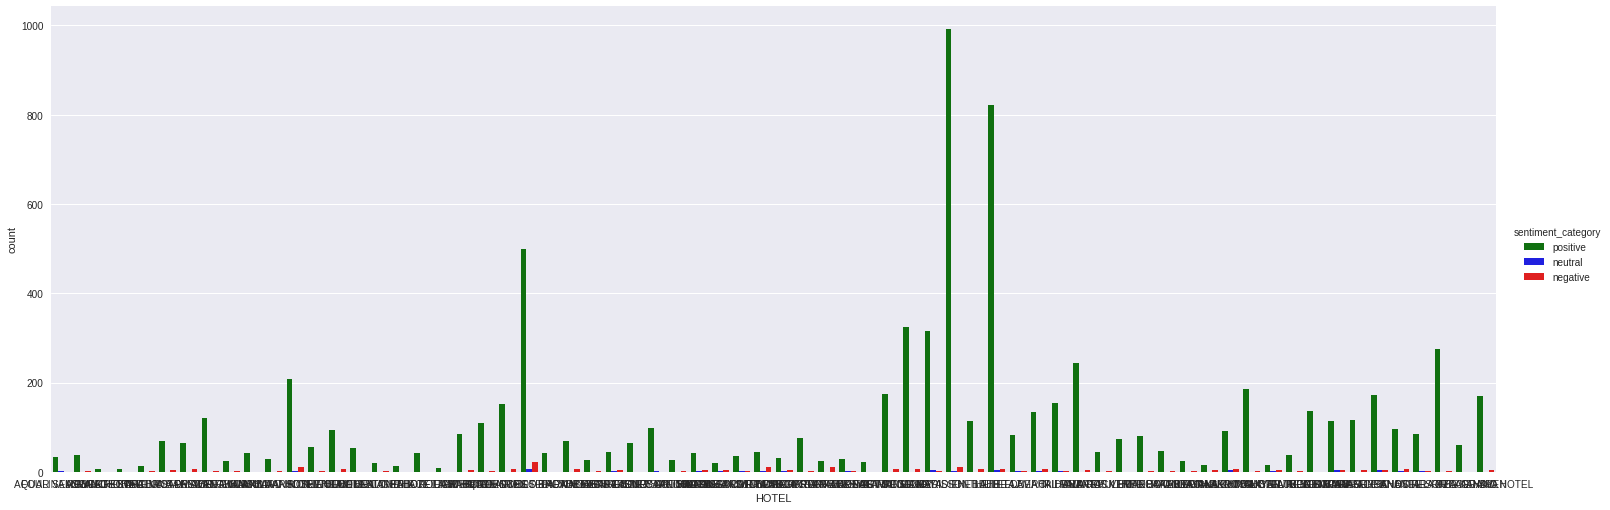

In [ ]:
# frequency of sentiment labels
#plt.figure(figsize=(200,20))
fc = sns.catplot(x="HOTEL", hue="sentiment_category", 
                 data=dfA, kind="count",
                 palette={'negative': 'red',
                          'positive': 'green',
                          'neutral': 'blue'}, height=7, aspect=3)

Text Blob

In [ ]:
from textblob import TextBlob

# computer sentiment scores (polarty) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                          else 'negative' if score < 0 
                          else 'neutral' 
                          for score in sentiment_scores_tb]

# sentiment statistics per news category
dfT = pd.DataFrame([list(df['HOTEL']), sentiment_scores_tb, sentiment_category_tb]).T
dfT.columns = ['HOTEL', 'sentiment_score', 'sentiment_category']
dfT['sentiment_score'] = dfT.sentiment_score.astype('float')
dfT.head()
#df.groupby(by=['COUNTRY']).describe()

,HOTEL,sentiment_score,sentiment_category
0,AQUALINA RESORT,0.362,positive
1,AQUALINA RESORT,0.444,positive
2,AQUALINA RESORT,0.205,positive
3,AQUALINA RESORT,0.337,positive
4,AQUALINA RESORT,0.322,positive


In [ ]:
dfT.to_csv('textblobresults.csv')

In [ ]:
dfT.groupby(by=['HOTEL']).describe()

sentiment_score            ...                
                                          count      mean  ...      75%    max
HOTEL                                                      ...                
ANANTARA PEACE HAVEN                      276.0  0.423348  ...  0.51350  0.764
AQUALINA RESORT                            35.0  0.336943  ...  0.42200  0.571
BANYAN TREE BINTAN                         39.0  0.395974  ...  0.47300  0.719
CAPE GRACE                                 28.0  0.344071  ...  0.42350  0.669
CENTARA CEYSANDS RESORT AND SPA           106.0  0.347774  ...  0.50675  0.733
...                                         ...       ...  ...      ...    ...
TRIDENT                                   156.0  0.404955  ...  0.51325  0.825
VICTORIA FALLS SAFARI LODGE                32.0  0.332250  ...  0.42050  0.623
VIVANTA                                   248.0  0.450883  ...  0.57000  0.825
WENTWORTH MANSION                          41.0  0.390537  ...  0.47200  0.712
WINCHESTER MANSIONS                        21.0  0.359333  ...  0.43800  0.590

[68 rows x 8 columns]

In [ ]:
dfA.groupby(by=['HOTEL']).describe().to_csv("textblob hotelwise description.csv")

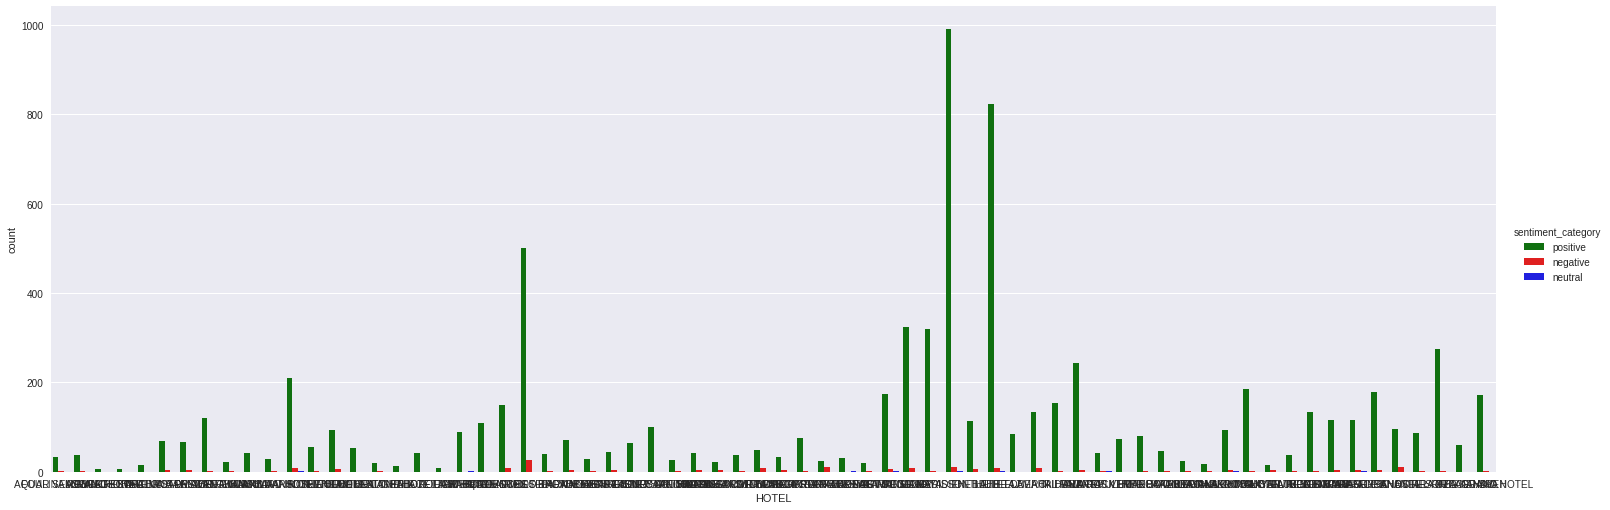

In [ ]:
fc = sns.catplot(x="HOTEL", hue="sentiment_category", 
                    data=dfT, kind="count", 
                    palette={'negative': 'red',
                             'positive': 'green',
                             'neutral': 'blue'}, height=7, aspect=3)

Comparison

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, ax, vmax=None,
                          normed=True, title='Confusion matrix',
                          class_names=None, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if normed:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, vmax=vmax, annot=True, square=True, ax=ax, 
                cmap='Blues', cbar=False, linecolor='k',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, fontsize=16)
    if not labels:
        labels=['True Labels', 'Predicted Labels']

    ax.set_ylabel(labels[0], fontsize=12)
    ax.set_xlabel(labels[1], y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

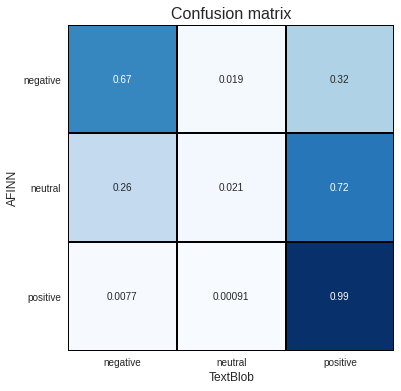

In [ ]:
fig, (axis1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
plot_confusion_matrix(sentiment_category, sentiment_category_tb, ax=axis1,
                      class_names=['negative', 'neutral', 'positive'],
                      labels=['AFINN', 'TextBlob'])